<h2 style="color:green" align="center">Machine Learning With Python: Linear Regression With One Variable</h2>

<h3 style="color:purple">Sample problem of predicting home price in monroe, new jersey (USA)</h3>

Below table represents current home prices in monroe township based on square feet area, new jersey

<img src="../Images/homepricetable.JPG" style="width:370px;height:250px">

**Problem Statement**: Given above data build a machine learning model that can predict home prices based on square feet area


You can represent values in above table as a scatter plot (values are shown in red markers). After that one can draw a straight line that best fits values on chart. 

<img src="../Images/scatterplot.JPG" style="width:600px;height:370px">

You can draw multiple lines like this but we choose the one where total sum of error is minimum

<img src="../Images/equation.PNG" style="width:600px;height:370px" >


You might remember about linear equation from your high school days math class. Home prices can be presented as following equation,

home price = m * (area) + b

Generic form of same equation is,

<img src="../Images/linear_equation.png" >

In [1]:
import pandas as pd
from sklearn import linear_model
import matplotlib.pyplot as plt

In [3]:
data = pd.read_csv('../DataSet/homeprices.csv')
print( data )

   area   price
0  2600  550000
1  3000  565000
2  3200  610000
3  3600  680000
4  4000  725000


In [4]:
x = data['area']
y = data['price']

print( x.head() )
print()
print( y.head() )

0    2600
1    3000
2    3200
3    3600
4    4000
Name: area, dtype: int64

0    550000
1    565000
2    610000
3    680000
4    725000
Name: price, dtype: int64


In [32]:
x.isnull().sum()   #- It is used to check the null values.

0

In [33]:
y.isnull().sum()

0

In [34]:
y.unique()

array([550000, 565000, 610000, 680000, 725000], dtype=int64)

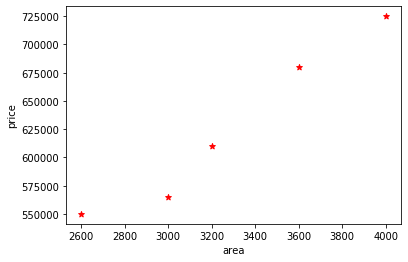

In [35]:
plt.scatter(x, y,color='red',marker='*')
plt.xlabel('area')
plt.ylabel('price')
plt.show()

In [36]:
from sklearn.linear_model import LinearRegression

In [37]:
# Create linear regression object
reg = LinearRegression()   #We are making the object where we are storing the specific LinearRegression function.

print(f"reg = {reg}")

print( f"reg.fit(area,price) = { reg.fit(area,price) }" ) 
#In LinearRegression(), we have a sub function fit where we are giving area and price as argument,
#Basically, .fit() is used to traing the data.

#Here we are training our data.

reg = LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)
reg.fit(area,price) = LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)


In [39]:
reg.predict( [[ 3000 ]] ) #Now training is done, we can now start testing our data using reg.predict().

#Note :- We can see from table that, for 3000 sq. fit the amount is 565000 but we are getting 587979.45205479

#so, This is the diffrence between training and testing.
#We gave our all data for training and then, we are getting new data as test data.

array([[587979.45205479]])

In [51]:
reg.score( area, price )

0.9584301138199486

In [52]:
reg.intercept_

array([180616.43835616])

In [53]:
reg.coef_

array([[135.78767123]])

**Y = m * X + b (m is coefficient and b is intercept)**

In [54]:
# Now, we are checking our Y values.
x = 3000
m = 135.78767123
b = 180616.43835616432

print( x*m + b )

#actually, prediction is working on m and b value only.
#reg.predict( x_value ) is just doing x*m + b and return the value of y as answer.

587979.4520461643


<h3 style="color:purple">Generate CSV file with list of home price predictions</h3>

In [55]:
print( df )
new_area_data = pd.read_csv('DataSet/area_dataset_for_input_after_prediction .csv')
print()
print( new_area_data )
print( type( new_area_data ) )

   area   price
0  2600  550000
1  3000  565000
2  3200  610000
3  3600  680000
4  4000  725000

    area
0   1000
1   1500
2   2300
3   3540
4   4120
5   4560
6   5490
7   3460
8   4750
9   2300
10  9000
11  8600
12  7100
<class 'pandas.core.frame.DataFrame'>


In [56]:
pred_price = reg.predict( new_area_data )  #we have already trained reg object. Now we, are predicting the price using area.
pred_price

array([[ 316404.10958904],
       [ 384297.94520548],
       [ 492928.08219178],
       [ 661304.79452055],
       [ 740061.64383562],
       [ 799808.21917808],
       [ 926090.75342466],
       [ 650441.78082192],
       [ 825607.87671233],
       [ 492928.08219178],
       [1402705.47945205],
       [1348390.4109589 ],
       [1144708.90410959]])

In [57]:
new_area_data['prices'] = pred_price    #We are creating a new columns in area_df dataFrame
new_area_data

,area,prices
0,1000,3.164041e+05
1,1500,3.842979e+05
2,2300,4.929281e+05
3,3540,6.613048e+05
4,4120,7.400616e+05
5,4560,7.998082e+05
6,5490,9.260908e+05
7,3460,6.504418e+05
8,4750,8.256079e+05
9,2300,4.929281e+05


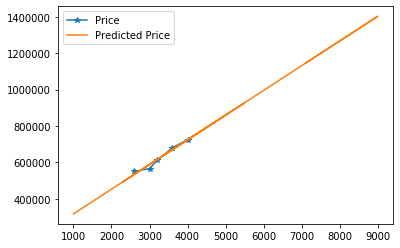

In [58]:
plt.plot( df['area'], df['price'], marker = '*', label = 'Price' )
plt.plot( new_area_data['area'], new_area_data['prices'], label = 'Predicted Price' )
plt.legend()
plt.show()

In [59]:
new_area_data.to_csv("DataSet/prediction.csv")             #Exporting the output as csv file.
print( new_area_data )

    area        prices
0   1000  3.164041e+05
1   1500  3.842979e+05
2   2300  4.929281e+05
3   3540  6.613048e+05
4   4120  7.400616e+05
5   4560  7.998082e+05
6   5490  9.260908e+05
7   3460  6.504418e+05
8   4750  8.256079e+05
9   2300  4.929281e+05
10  9000  1.402705e+06
11  8600  1.348390e+06
12  7100  1.144709e+06


In [60]:
'''
#Steps in Linear Regression,

S1 :- import libraries( pandas to read files, from sklearn import linear_model for linear regression, matplotlib.pyplot for graphs)

S2 :- Read the data from a file

S3 :- make object of linear_model.LinearRegression() [ EX :- reg = linear_model.LinearRegression() ]
    
S4 :- Fit the model or train the data using object.fit(col1, col2, .., coln). [ Ex :- reg.fit( col1, col2, .. ) ]
    
S5 :- Predict the Model by object.predict([[columns]])  [ Ex:- reg.predict( [ [ value ] ] ) or reg.predict( DataFrame )
'''

'\n#Steps in Linear Regression,\n\nS1 :- import libraries( pandas to read files, from sklearn import linear_model for linear regression, matplotlib.pyplot for graphs)\n\nS2 :- Read the data from a file\n\nS3 :- make object of linear_model.LinearRegression() [ EX :- reg = linear_model.LinearRegression() ]\n    \nS4 :- Fit the model or train the data using object.fit(col1, col2, .., coln). [ Ex :- reg.fit( col1, col2, .. ) ]\n    \nS5 :- Predict the Model by object.predict([[columns]])  [ Ex:- reg.predict( [ [ value ] ] ) or reg.predict( DataFrame )\n'